# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [3]:
import numpy as np
import pandas as pd
import math

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [4]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [5]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


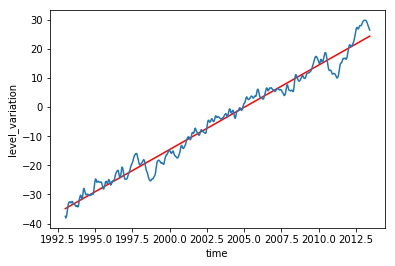

In [62]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #
y_axis = sea_level_df['level_variation'].values
x_axis = sea_level_df['time'].values

def ols(x_axis, y_axis, num_of_data):
    x_sum = 0
    y_sum = 0
    xy_sum = 0;
    x_sq = 0
    y_sq = 0
    for i in x_axis:
        x_sum += i
        x_sq += i*i
    for i in y_axis:
        y_sum += i
        y_sq += i*i
    for i in range(num_of_data):
        xy_sum += x_axis[i]*y_axis[i]
    a = (num_of_data*xy_sum-(x_sum*y_sum))/(num_of_data*x_sq - (x_sum)*(x_sum))
    b = (y_sum-a*x_sum)/(num_of_data)
    return a,b

def convient_plot(x_axis, y_axis, predicted_y, x_label, y_label, title = ''):
    plt.figure()
    plt.plot(x_axis, predicted_y, 'r')
    plt.plot(x_axis, y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if (title != ''):
        plt.title(title)
    
num_of_data = sea_level_df['time'].count()
a, b = ols(x_axis = x_axis, y_axis = y_axis, num_of_data = num_of_data)
y = a*x_axis + b
convient_plot(x_axis, y_axis, y, 'time', 'level_variation')

# Predict using OLS model
# Plot training data along with the regression curve

In [70]:
# Part b - Prediction of testing points #
def calculate_MSE(a, b, x_axis_test, y_axis_test, num_of_data_test):
    MSE_sum = 0
    for i in range(num_of_data_test):
        MSE_sum += abs(a*x_axis_test[i]+b-y_axis_test[i])**2
    MSE = MSE_sum/num_of_data_test
    return MSE

y_axis_test = sea_level_df_test['level_variation'].values
x_axis_test = sea_level_df_test['time'].values
num_of_data_test = sea_level_df_test['time'].count()
# for i in range(num_of_data_test):
#     MSE_sum += abs(a*x_axis_test[i]+b-y_axis_test[i])**2
# MSE = MSE_sum/num_of_data_test
MSE = calculate_MSE(a, b, x_axis_test, y_axis_test, num_of_data_test)
print("MSE is", MSE)

# Calculate mean squared error between ground truth and predictions

MSE is 90.73366380489954


MSE for window size five is 28.44359834123166
MSE for window size seven is 28.78207424066322
MSE for window size fifteen is 114.27978357225277


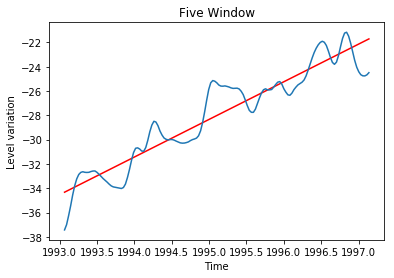

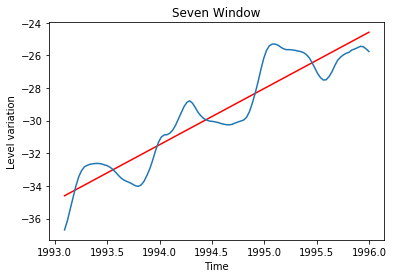

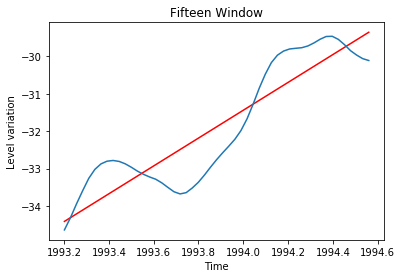

In [73]:
# Part c - data transformations #
# ROLLING MEAN
size_of_window_five = int(math.ceil(num_of_data/5))
size_of_window_seven = int(math.ceil(num_of_data/7))
size_of_window_fifteen = int(math.ceil(num_of_data/15))

x_window_five = np.zeros(size_of_window_five)
x_window_seven = np.zeros(size_of_window_seven)
x_window_fifteen = np.zeros(size_of_window_fifteen)
y_window_five = np.zeros(size_of_window_five)
y_window_seven = np.zeros(size_of_window_seven)
y_window_fifteen = np.zeros(size_of_window_fifteen)

five_pad_x = np.concatenate((x_axis, np.zeros(size_of_window_five*5 - num_of_data)))
seven_pad_x = np.concatenate((x_axis, np.zeros(size_of_window_seven*7 - num_of_data)))
fifteen_pad_x = np.concatenate((x_axis, np.zeros(size_of_window_fifteen*15 - num_of_data)))
five_pad_y = np.concatenate((y_axis, np.zeros(size_of_window_five*5 - num_of_data)))
seven_pad_y = np.concatenate((y_axis, np.zeros(size_of_window_seven*7 - num_of_data)))
fifteen_pad_y = np.concatenate((y_axis, np.zeros(size_of_window_fifteen*15 - num_of_data)))

for i in range(size_of_window_five):
    x_j = 0
    y_j = 0
    for j in range(5):
        x_j += five_pad_x[i+j]
        y_j += five_pad_y[i+j]
    x_window_five[i] = x_j/5
    y_window_five[i] = y_j/5
    
for i in range(size_of_window_seven):
    x_j = 0
    y_j = 0
    for j in range(7):
        x_j += seven_pad_x[i+j]
        y_j += seven_pad_y[i+j]
    x_window_seven[i] = x_j/7
    y_window_seven[i] = y_j/7

for i in range(size_of_window_fifteen):
    x_j = 0
    y_j = 0
    for j in range(15):
        x_j += fifteen_pad_x[i+j]
        y_j += fifteen_pad_y[i+j]
    x_window_fifteen[i] = x_j/15
    y_window_fifteen[i] = y_j/15    
# Repeat parts a and b for rolling mean

a_five, b_five = ols(x_window_five, y_window_five, size_of_window_five)
a_seven, b_seven = ols(x_window_seven, y_window_seven, size_of_window_seven)
a_fifteen, b_fifteen = ols(x_window_fifteen, y_window_fifteen, size_of_window_fifteen)

y_five = a_five*x_window_five + b_five
y_seven = a_seven*x_window_seven + b_seven
y_fifteen = a_fifteen*x_window_fifteen + b_fifteen

convient_plot(x_window_five, y_window_five, y_five, "Time", "Level variation", "Five Window")
convient_plot(x_window_seven, y_window_seven, y_seven, "Time", "Level variation", "Seven Window")
convient_plot(x_window_fifteen, y_window_fifteen, y_fifteen, "Time", "Level variation", "Fifteen Window")

MSE_five = calculate_MSE(a_five, b_five, x_axis_test, y_axis_test, num_of_data_test)
MSE_seven = calculate_MSE(a_seven, b_seven, x_axis_test, y_axis_test, num_of_data_test)
MSE_fifteen = calculate_MSE(a_fifteen, b_fifteen, x_axis_test, y_axis_test, num_of_data_test)

print("MSE for window size five is", MSE_five)
print("MSE for window size seven is", MSE_seven)
print("MSE for window size fifteen is", MSE_fifteen)

1336676001.5230358


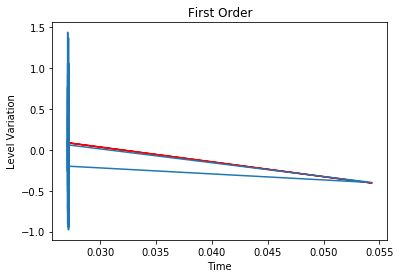

In [85]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING
first_order_size = num_of_data - 1
first_order_x_axis = np.zeros(first_order_size)
first_order_y_axis = np.zeros(first_order_size)

for i in range(first_order_size):
    first_order_x_axis[i] = x_axis[i+1] - x_axis[i]
    first_order_y_axis[i] = y_axis[i+1] - y_axis[i]
first_order_a, first_order_b = ols(first_order_x_axis, first_order_y_axis, first_order_size)
y_first_order = first_order_a*first_order_x_axis + first_order_b
convient_plot(first_order_x_axis, first_order_y_axis, y_first_order, "Time", "Level Variation", "First Order")
# Repeat parts a and b for first order differencing
MSE_first_order = calculate_MSE(first_order_a, first_order_b, x_axis_test, y_axis_test, num_of_data_test)
print(MSE_first_order)


In [8]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION

# Repeat parts a and b for your own transformation

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

a.

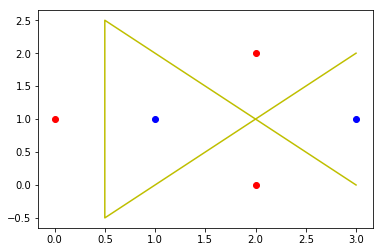

In [143]:
x_knn_pos = np.array([0,2,2])
y_knn_pos = np.array([1,2,0])
x_knn_neg = np.array([1,3])
y_knn_neg = np.array([1,1])
plt.figure()
plt.scatter(x_knn_pos, y_knn_pos, c = 'r')
plt.scatter(x_knn_neg, y_knn_neg, c = 'b')

boundary_x = np.array([3,0.5,0.5,3])
boundary_y = np.array([2,-0.5,2.5,0])
plt.plot(boundary_x, boundary_y, 'y')

b.

point(0,0) is in +
point(1,2) is in -
point(2,1) is in -
point(3,3) is in +
point(4,3) is in -


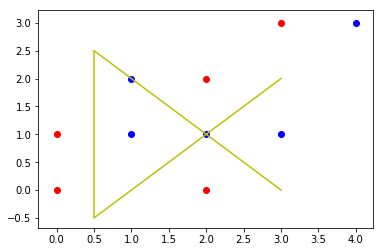

In [144]:
classify_x = np.array([0,1,2,3,4])
classify_y = np.array([0,2,1,3,3])
classify_result = np.array([False]*5)
for i in range(5):
    isPos = False
    minDistance = 1000
    for j in range(2):
        testDistance = math.sqrt(abs(x_knn_neg[j] - classify_x[i])**2 + abs(y_knn_neg[j] - classify_y[i])**2)
        if(testDistance  < minDistance):
            minDistance = testDistance
    for j in range(3):
        testDistance = math.sqrt(abs(x_knn_pos[j] - classify_x[i])**2 + abs(y_knn_pos[j] - classify_y[i])**2)
        if(testDistance  < minDistance):
            minDistance = testDistance
            isPos = True
    classify_result[i] = isPos
for i in range(5):
    if (classify_result[i]):
        print(f"point({classify_x[i]},{classify_y[i]}) is in +")
        plt.scatter([classify_x[i]],[classify_y[i]], c ='r')
    else:
        print(f"point({classify_x[i]},{classify_y[i]}) is in -")
        plt.scatter([classify_x[i]],[classify_y[i]], c = 'b')
plt.scatter(x_knn_pos, y_knn_pos, c = 'r')
plt.scatter(x_knn_neg, y_knn_neg, c = 'b')
plt.plot(boundary_x, boundary_y, 'y')

c. Do k-nn in that case and do a majority vote

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [146]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [147]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [167]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set
best_k_iris = 0
best_accu_iris = 0

for i in range(10):
    neigh = KNeighborsClassifier(i+1)
    neigh.fit(X_iris_train, y_iris_train)
    y_pred = neigh.predict(X_iris_test)
    score = metrics.accuracy_score(y_iris_test, y_pred)
    if (score > best_accu_iris):
        best_accu_iris = score
        best_k_iris = i+1
print(f"k with highest accuracy {best_accu_iris} is {best_k_iris}")

decTree_iris = tree.DecisionTreeClassifier()
decTree_iris.fit(X_iris_train, y_iris_train)
y_pred_dec_iris = decTree.predict(X_iris_test)
dec_score_iris = metrics.accuracy_score(y_iris_test, y_pred_dec_iris)
print(f"Decision accuracy is {dec_score_iris}")
# Construct a decision tree on the training data.
# Test decision tree with testing set"Decision accuracy is {dec_score}"

# Compare accuracies between the two algorithms (print them out)


k with highest accuracy 0.9777777777777777 is 6
Decision accuracy is 0.9333333333333333


In [172]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

# Construct a decision tree on the training data
# Test decision tree with testing set

# Compare accuracies between the two algorithms (print them out)
best_k_wine = 0
best_accu_wine = 0

for i in range(10):
    neigh = KNeighborsClassifier(i+1)
    neigh.fit(X_wine_train, y_wine_train)
    y_pred = neigh.predict(X_wine_test)
    score = metrics.accuracy_score(y_wine_test, y_pred)
    if (score > best_accu_wine):
        best_accu_wine = score
        best_k_wine = i+1
print(f"k with highest accuracy {best_accu_wine} is {best_k_wine}")

decTree_wine = tree.DecisionTreeClassifier()
decTree_wine.fit(X_wine_train, y_wine_train)
y_pred_dec_wine = decTree_wine.predict(X_wine_test)
dec_score_wine = metrics.accuracy_score(y_wine_test, y_pred_dec_wine)
print(f"Decision accuracy is {dec_score_wine}")

k with highest accuracy 0.7777777777777778 is 1
Decision accuracy is 1.0


b.

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

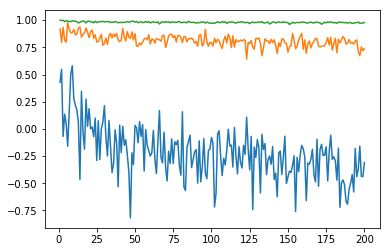

In [265]:
# Plot n p-dimensional uniformly-distributed data points
# n_five_array = np.ndarray(shape=(2,5),dtype=float)
n_fifty_array = np.random.uniform(-1,1,50)
n_five_hundred_array = np.random.uniform(-1,1,500)

# n_five_array[0] = np.random.uniform(-1,1,5)
# print(n_five_array)
# print(n_five_array[0].max())
def plot(n):
    nearest_distance = np.zeros(200)
    nearest_distance.fill(3)
    for p in range(200):
        n_five_array = np.ndarray(shape=(p+1,n),dtype=float)
        for i in range(p+1):
            n_five_array[i] = np.random.uniform(-1,1,n)
        for i in range(p+1):
            if (n_five_array[i].max() < nearest_distance[p]):
                nearest_distance[p] = n_five_array[i].max()
    plt.plot(range(1,201), nearest_distance)
plot(5)
plot(50)
plot(500)
# print(n_five_hundred_array)
# Compute nearest neighbors to the origin in terms of maximum norm


# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.

**`[double click here to add plots, if you programmed your solution outside Jupyter]`**